# Trabalho Grafos 01

# instalação de  bibliotecas com pip

In [ ]:
%pip install spotipy
%pip install networkx
%pip install matplotlib
%pip install scipy

# biblioteca Spotyfy

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import networkx as nx
import matplotlib.pyplot as plt

# Configurar as credenciais da API do Spotify
CLIENT_ID = 'f216308e304c4ba3be3fb4ce0f23ceb9'
CLIENT_SECRET = '33c84036de384fcc914b82a173cea2dc'

# Configurar a autenticação OAuth do Spotify
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri="http://localhost:8888/callback"))


# Busca Grafo no Spotyfy

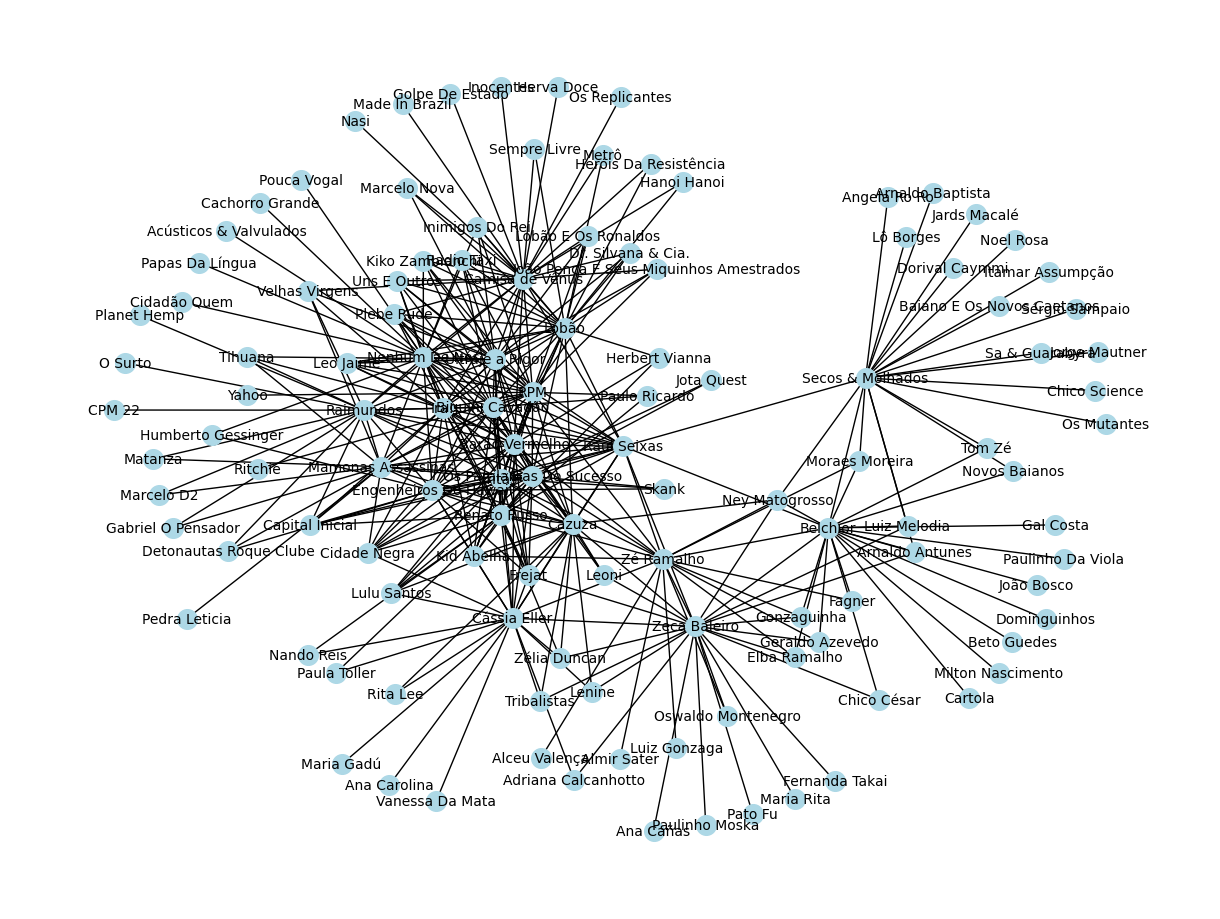

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import networkx as nx
import matplotlib.pyplot as plt

# Configurar as credenciais da API do Spotify
CLIENT_ID = 'f216308e304c4ba3be3fb4ce0f23ceb9'
CLIENT_SECRET = '33c84036de384fcc914b82a173cea2dc'

# Configurar a autenticação OAuth do Spotify
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri="http://localhost:8888/callback"))

# Função para criar um grafo de artistas relacionados
def criar_grafo_artistas_relacionados(artist_name, depth=1):
    # Inicializa um grafo vazio
    G = nx.Graph()
    # Conjunto para rastrear artistas já visitados
    artistas_visitados = set()
    
    #Esta é a função principal que realiza a busca em largura no grafo de artistas relacionados.
    def buscar_artistas_relacionados(artist_name, depth):

        # Condição de parada quando a profundidade (depth) atinge 0 ou menos, a busca é encerrada. Isso limita o número de níveis da busca.
        if depth <= 0:
            return
        
        # Verifica se o artista atual já foi visitado para evitar visitas duplicadas.
        if artist_name not in artistas_visitados:
            
            #Adiciona o artista atual à lista de artistas visitados.
            artistas_visitados.add(artist_name)
            
            # Pesquisa por informações do artista no Spotify
            artist_info = sp.search(q=f'artist:{artist_name}', type='artist', limit=1)['artists']['items'][0]
            artist_id = artist_info['id']
            
            # Obtém artistas relacionados
            related_artists = sp.artist_related_artists(artist_id)

            # Itera sobre os artistas relacionados encontrados.
            for related_artist in related_artists['artists']:
                related_artist_name = related_artist['name']
                # Adiciona uma aresta entre o artista atual e os relacionados
                G.add_edge(artist_name, related_artist_name)
                # Chama recursivamente a função para artistas relacionados
                buscar_artistas_relacionados(related_artist_name, depth - 1)
    
    # Inicializa a busca com o artista inicial
    buscar_artistas_relacionados(artist_name, depth)
    return G

# Função para plotar o grafo de forma expandida
def plotar_grafo_expandido(grafo):
    # Define o tamanho da figura (largura x altura) conforme necessário
    plt.figure(figsize=(12, 9))
    
    # Layout do grafo (usando o Kamada-Kawai para uma visualização melhor)
    pos = nx.kamada_kawai_layout(grafo)
    
    # Desenha o grafo com rótulos, tamanho de nó maior e cores personalizadas
    nx.draw(grafo, pos, with_labels=True, node_size=200, node_color='lightblue', font_size=10, font_color='black')
    
    # Aumenta o tamanho da fonte dos rótulos dos nós para torná-los mais legíveis
    labels = nx.get_node_attributes(grafo, 'label')
    nx.draw_networkx_labels(grafo, pos, labels, font_size=12)
    
    # Exibe o gráfico sem eixos
    plt.axis('off')
    plt.show()

# Exemplo de uso  altere o nome do artista para o que desejar
artista_inicial = 'Raul Seixas'
# Cria o grafo de artistas relacionados com profundidade 2
grafo_artistas = criar_grafo_artistas_relacionados(artista_inicial, depth=2)
# Plota o grafo de forma expandida
plotar_grafo_expandido(grafo_artistas)


# Salvar Grafo em Json

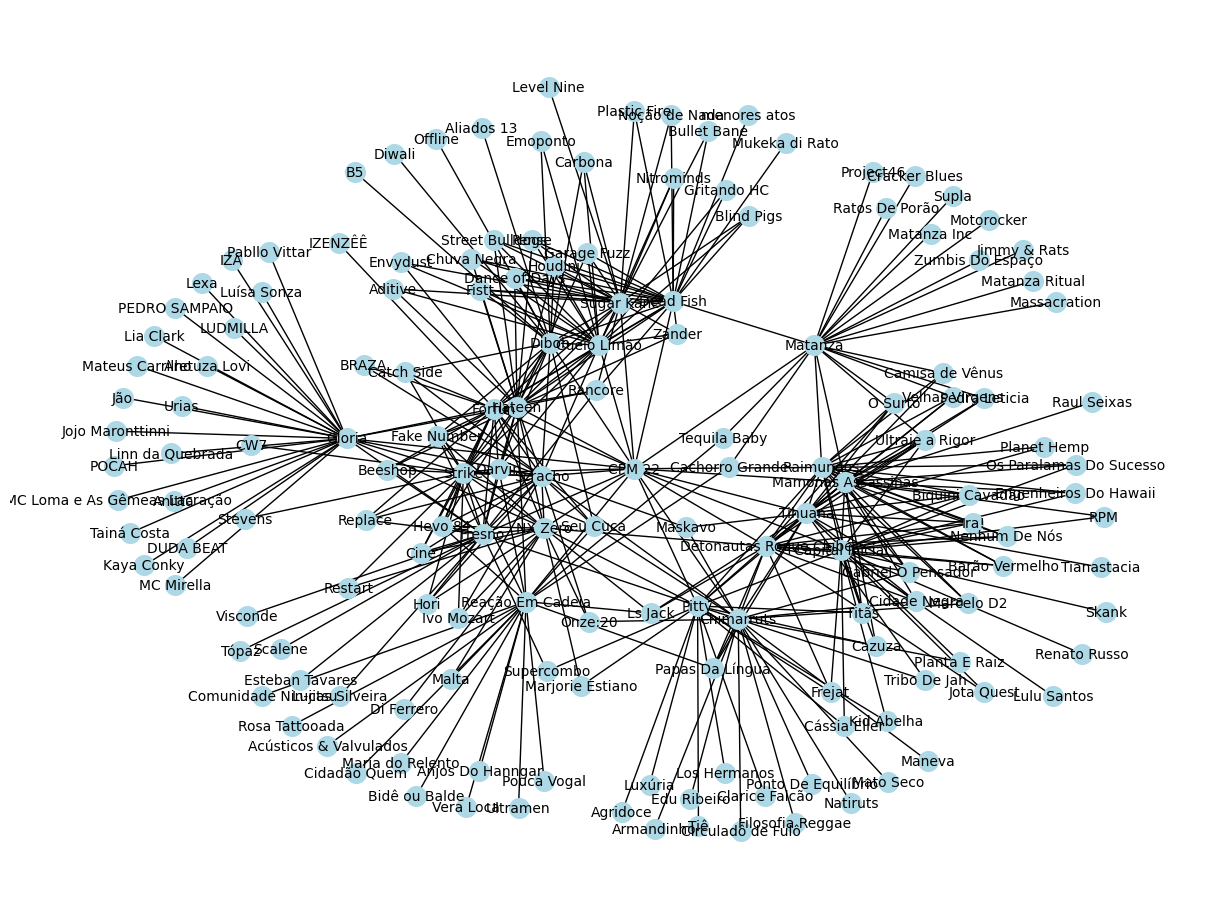

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# ... Configuração de credenciais e autenticação do Spotify ...

# Configurar as credenciais da API do Spotify
CLIENT_ID = 'f216308e304c4ba3be3fb4ce0f23ceb9'
CLIENT_SECRET = '33c84036de384fcc914b82a173cea2dc'

# Configurar a autenticação OAuth do Spotify
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri="http://localhost:8888/callback"))

# Função para criar um grafo de artistas relacionados
# Função para criar um grafo de artistas relacionados
def criar_grafo_artistas_relacionados(artist_name, depth=1):
    # Inicializa um grafo vazio
    G = nx.Graph()
    # Conjunto para rastrear artistas já visitados
    artistas_visitados = set()

    # Esta é a função principal que realiza a busca em largura no grafo de artistas relacionados.
    def buscar_artistas_relacionados(artist_name, depth):

        # Condição de parada quando a profundidade (depth) atinge 0 ou menos, a busca é encerrada. Isso limita o número de níveis da busca.
        if depth <= 0:
            return

        # Verifica se o artista atual já foi visitado para evitar visitas duplicadas.
        if artist_name not in artistas_visitados:

            # Adiciona o artista atual à lista de artistas visitados.
            artistas_visitados.add(artist_name)

            # Pesquisa por informações do artista no Spotify
            artist_info = sp.search(q=f'artist:{artist_name}', type='artist', limit=1)['artists']['items'][0]
            artist_id = artist_info['id']

            # Obtém artistas relacionados
            related_artists = sp.artist_related_artists(artist_id)

            # Itera sobre os artistas relacionados encontrados.
            for related_artist in related_artists['artists']:
                related_artist_name = related_artist['name']
                # Adiciona uma aresta entre o artista atual e os relacionados
                G.add_edge(artist_name, related_artist_name)
                # Chama recursivamente a função para artistas relacionados
                buscar_artistas_relacionados(related_artist_name, depth - 1)

    # Inicializa a busca com o artista inicial
    buscar_artistas_relacionados(artist_name, depth)
    return G

# Função para salvar o grafo em formato JSON
def salvar_grafo_para_json(grafo, nome_arquivo):
    data = nx.node_link_data(grafo)
    with open(nome_arquivo, 'w') as arquivo_json:
        json.dump(data, arquivo_json, indent=4)

# Exemplo de uso
artista_inicial = 'CPM 22'
# Cria o grafo de artistas relacionados com profundidade 2
grafo_artistas = criar_grafo_artistas_relacionados(artista_inicial, depth=2)
# Salva o grafo em um arquivo JSON
nome_arquivo_json = 'grafo_DFS_'+ artista_inicial.replace( " ", "_")+'.json'
salvar_grafo_para_json(grafo_artistas, nome_arquivo_json)

# Plota o grafo de forma expandida
plotar_grafo_expandido(grafo_artistas)


# Salvar Grafo em Json  Artista relacionados com BFS

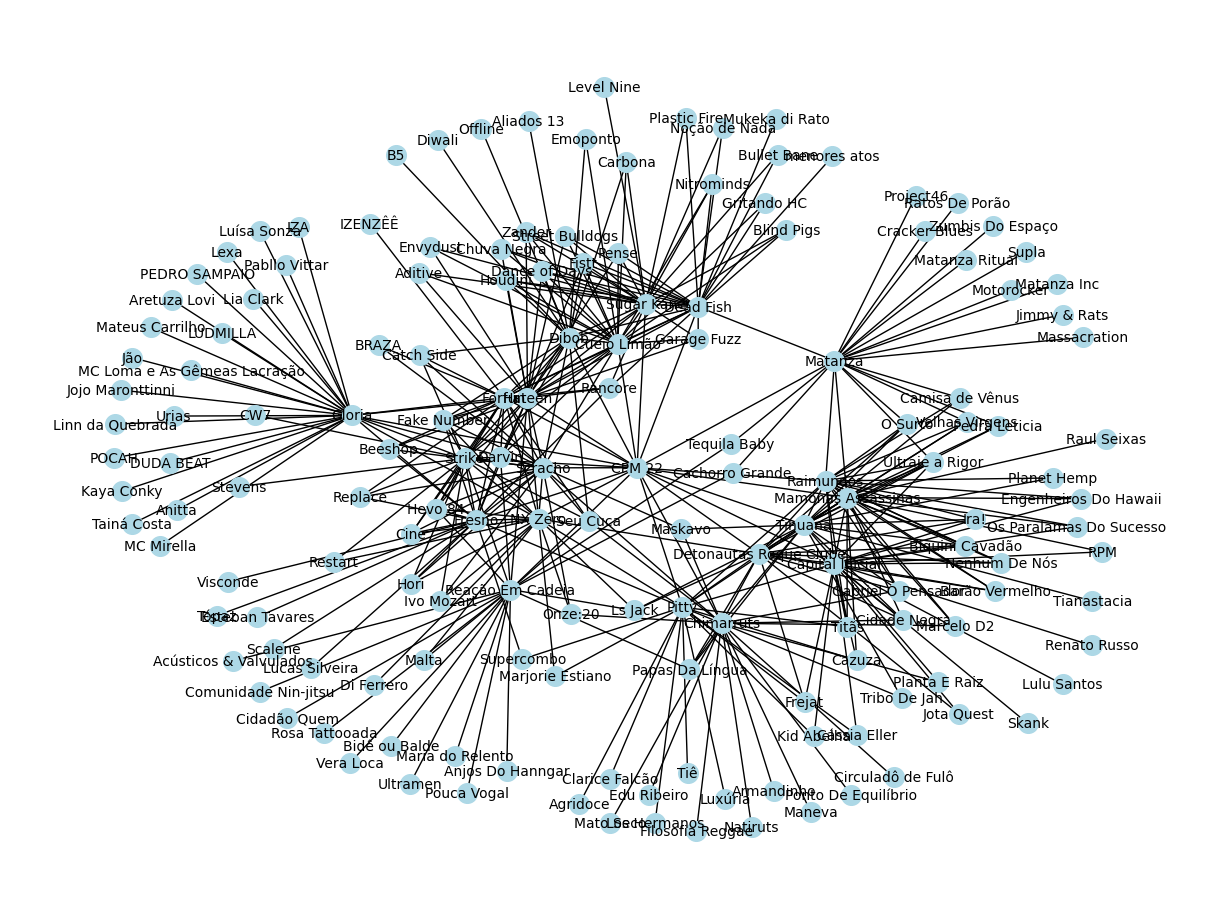

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from collections import deque

# ... Configuração de credenciais e autenticação do Spotify ...

# Configurar as credenciais da API do Spotify
CLIENT_ID = 'f216308e304c4ba3be3fb4ce0f23ceb9'
CLIENT_SECRET = '33c84036de384fcc914b82a173cea2dc'

# Configurar a autenticação OAuth do Spotify
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri="http://localhost:8888/callback"))

# Função para criar um grafo de artistas relacionados usando busca em largura (BFS)
def criar_grafo_artistas_relacionados(artist_name, depth=1):
    # Inicializa um grafo vazio
    G = nx.Graph()
    # Conjunto para rastrear artistas já visitados
    artistas_visitados = set()
    # Fila para a busca em largura (BFS)
    fila = deque()

    # Adiciona o artista inicial à fila
    fila.append((artist_name, depth))  # Agora inclui a profundidade na fila

    # Realiza a busca em largura (BFS)
    while fila:
        # Remove o próximo artista e profundidade da fila
        current_artist, current_depth = fila.popleft()

        # Verifica se a profundidade atual é maior que zero
        if current_depth > 0:
            # Verifica se o artista atual já foi visitado para evitar visitas duplicadas.
            if current_artist not in artistas_visitados:
                # Adiciona o artista atual à lista de artistas visitados.
                artistas_visitados.add(current_artist)

                # Pesquisa por informações do artista no Spotify
                artist_info = sp.search(q=f'artist:{current_artist}', type='artist', limit=1)['artists']['items'][0]
                artist_id = artist_info['id']

                # Obtém artistas relacionados
                related_artists = sp.artist_related_artists(artist_id)

                # Itera sobre os artistas relacionados encontrados.
                for related_artist in related_artists['artists']:
                    related_artist_name = related_artist['name']
                    # Adiciona uma aresta entre o artista atual e os relacionados
                    G.add_edge(current_artist, related_artist_name)
                    # Adiciona o artista relacionado à fila com profundidade reduzida para continuar a busca em largura (BFS)
                    fila.append((related_artist_name, current_depth - 1))

    return G

# Função para salvar o grafo em formato JSON
def salvar_grafo_para_json(grafo, nome_arquivo):
    data = nx.node_link_data(grafo)
    with open(nome_arquivo, 'w') as arquivo_json:
        json.dump(data, arquivo_json, indent=4)

# Exemplo de uso 
#n Nome do artista a ser buscado.
artista_inicial = 'CPM 22'
profundidade = 2  # Altere a profundidade desejada aqui
# Cria o grafo de artistas relacionados com a profundidade especificada usando busca em largura (BFS)
grafo_artistas = criar_grafo_artistas_relacionados(artista_inicial, depth=profundidade)
# Salva o grafo em um arquivo JSON
nome_arquivo_json = f'grafo_{artista_inicial.replace(" ", "_")}_profundidade_{profundidade}.json'
salvar_grafo_para_json(grafo_artistas, nome_arquivo_json)

# Plota o grafo de forma expandida
plotar_grafo_expandido(grafo_artistas)


## Plota grafo em cores

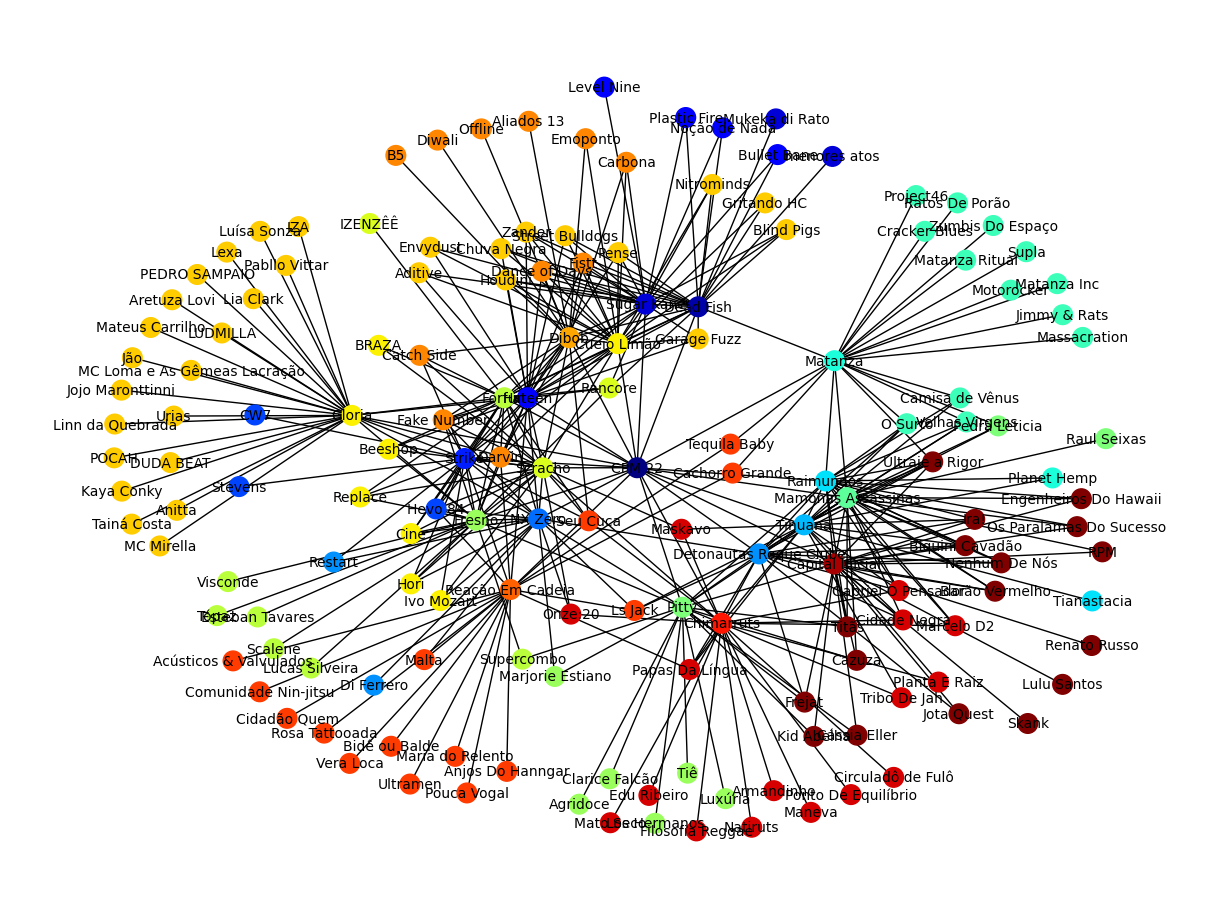

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Função para carregar um grafo de um arquivo JSON
def carregar_grafo_de_json(nome_arquivo):
    with open(nome_arquivo, 'r') as arquivo_json:
        data = json.load(arquivo_json)
        grafo = nx.node_link_graph(data)
    return grafo

# Função para realizar uma busca em profundidade (DFS) em um grafo
def dfs(grafo, vertice, camada, cores, visitados):
    if vertice not in visitados:
        visitados.add(vertice)
        cores[vertice] = camada  # Atribui uma cor à camada atual
        for vizinho in grafo.neighbors(vertice):
            dfs(grafo, vizinho, camada + 1, cores, visitados)

# Função para plotar o grafo com cores por camada
def plotar_grafo_com_cores(grafo, cores):
    plt.figure(figsize=(12, 9))
    pos = nx.kamada_kawai_layout(grafo)
    
    # Obter uma lista de cores exclusivas com base nas camadas
    unique_colors = list(set(cores.values()))
    
    # Criar um mapa de cores personalizado
    color_map = [plt.cm.jet(i / max(unique_colors)) for i in unique_colors]
    
    # Atribuir cores aos nós com base nas camadas
    node_colors = [color_map[cores[nodo]] for nodo in grafo.nodes]
    
    # Plotar o grafo com as cores
    nx.draw(grafo, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=10, font_color='black')
    labels = nx.get_node_attributes(grafo, 'label')
    nx.draw_networkx_labels(grafo, pos, labels, font_size=12)
    
    plt.axis('off')
    plt.show()

#no Principal do Grafo.
    
vertice_inicial = 'CPM 22'
profundidade = 2  # Altere a profundidade desejada aqui

# Nome do arquivo JSON com o grafo
nome_arquivo_artista = f'grafo_{vertice_inicial.replace(" ", "_")}_profundidade_{profundidade}.json'

# Carregar o grafo a partir do arquivo JSON
grafo_artistas = carregar_grafo_de_json(nome_arquivo_artista)

# Realizar uma busca em profundidade (DFS) a partir de um vértice inicial


visitados_dfs = set()
cores_por_camada = {}
dfs(grafo_artistas, vertice_inicial, 0, cores_por_camada, visitados_dfs)

# Plotar o grafo com cores por camada
plotar_grafo_com_cores(grafo_artistas, cores_por_camada)
